# SETUP

In [1]:
import os
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib import rcParams

rcParams["font.family"] = 'Nanum Gothic'
rcParams["font.size"] = 20
rcParams["figure.figsize"] = (14,4)

from krwordrank.hangle import normalize
from krwordrank.word import KRWordRank

In [67]:
from konlpy.tag import Komoran
komoran = Komoran()

In [30]:
import matplotlib.font_manager as fm

In [44]:
print(rcParams['font.size'])
print(rcParams['font.family'])

20.0
['Nanum Gothic']


In [2]:
!ls

00_OVERVIEW.ipynb                  geckodriver.log
01_COLLECTION_kh, js.ipynb         ja_.pkl
02_Analytics.ipynb                 ja_whole.pkl
02_COLLECTION_joongang, hani.ipynb ja_whole2.pkl
03_Analytics_cs.ipynb              joongangilbo.csv
03_cs_wordcloud.ipynb              kh_100.pkl
LICENSE                            kh_50.pkl
README.md                          kh_whole.pkl
article                            lexicon
chosun_raw.pkl                     tmp
chosun_raw2.pkl                    userdic.txt
cs_whole.pkl


In [6]:
cs_raw = pd.read_pickle('cs_whole.pkl')
cs_raw.tail()

,date,title,body
1017,2017.03.06,"[사설] 운명의 일주일, '탄핵' '기각' 이후가 더 중요하다",이르면 이번 주 후반 박근혜 대통령 탄핵 심판 사건에 대한 헌재 결정이 나올 가능성...
1018,2017.03.07,[사설] 중국 땅인지 착각게 한 롯데 앞 촛불 시위대,지난 4일 밤 광주 롯데백화점 앞 촛불 시위 사진은 눈을 의심케 했다. 수백 명이 ...
1019,2017.03.07,"[사설] 특검, '최순실 국정농단'의 本流 꿰뚫은 수사였나",박영수 특검팀이 6일 수사 결과를 발표했다. 그러나 평가는 엇갈린다. 구속기소된 이...
1020,2017.03.09,"[사설] 10일 탄핵 심판 선고, 모두 自重하고 또 自制하자",박근혜 대통령 탄핵 심판 선고 기일이 10일로 확정됐다. 헌재 재판관 8명이 8일 ...
1021,2017.03.10,"[사설] 오늘 시험대 오르는 대한민국, '역사적 승복'으로 위기 끝내자",헌법재판소가 오늘 11시 박근혜 대통령 탄핵심판 사건을 선고한다. 작년 10월 5일...


In [13]:
corpus = ""
texts = cs_raw.body
for text in texts:
    corpus += text
corpus = re.sub('\n', ' ', corpus)

In [16]:
len(corpus)

1328703

In [50]:
corpus_refined = normalize(corpus, english=True, number=True)

In [52]:
len(corpus_refined)

1278165

In [57]:
texts = list(texts)
len(texts)

1022

In [58]:
texts = [normalize(text, english=True, number=True) for text in texts]
len(texts)

1022

In [59]:
wordrank_extractor = KRWordRank(
    min_count = 5,
    max_length = 15,
    verbose = True
)
beta = 0.85
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 27284
done


In [60]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      있다:	86.9167
     대통령:	80.2204
      한다:	72.8608
      것이:	46.1359
      했다:	39.5781
     박근혜:	37.7653
      정부:	37.1670
      국민:	35.7167
      것은:	34.5956
     청와대:	34.1536
      있는:	33.9414
      없다:	33.1675
      대한:	31.2927
      이런:	29.4406
     그러나:	28.7876
      우리:	25.3891
      국회:	24.5561
      대해:	23.0152
      경제:	23.0025
      정치:	21.9269
      문제:	21.6144
      국정:	21.1671
      지금:	21.1018
      지난:	20.6680
      이번:	20.0620
      야당:	18.6264
      하는:	17.1563
      북한:	16.4862
      위해:	16.3101
      인사:	15.9103


In [61]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [63]:
array = wc.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(200, 400, 3)


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falli

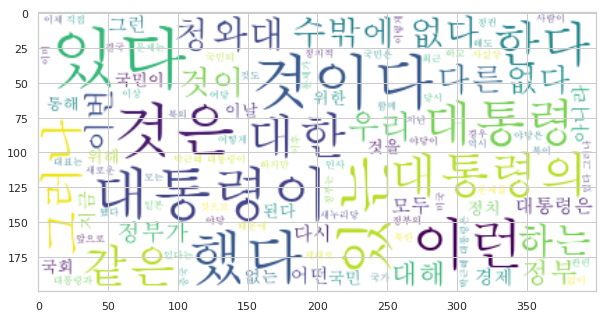

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1329: UserWarning: findfont: Font family ['Nanum Gothic'] not found. Falli

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

In [46]:
# Create and Generate a word cloud image:
wc = WordCloud(max_font_size=50, max_words=100, font_path='/Library/Fonts/AppleMyungjo.ttf',
               background_color="white").generate(corpus)

In [38]:
path = '/Library/Fonts/AppleMyungjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [ ]:
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()